In [1]:
import pickle
with open('../data/languages', 'rb') as f:
    eng_words_noint, french_words_noint, german_words_noint = pickle.load(f)

In [2]:
eng_words_noint

['pan',
 'chart',
 'pink',
 'bulldog',
 'lumpy',
 'simon',
 'fer',
 'man',
 'detail',
 'hob',
 'jet',
 'the',
 'encore',
 'per',
 'vase',
 'vandal',
 'ext',
 'sky',
 'mar',
 'pros',
 'market',
 'pep',
 'ice',
 'gag',
 'link',
 'mash',
 'mops',
 'super',
 'epic',
 'den',
 'bulk',
 'bug',
 'mat',
 'lead',
 'stalker',
 'dodo',
 'scorpion',
 'the',
 'pal',
 'lava',
 'pet',
 'mates',
 'mini',
 'ply',
 'focus',
 'dark',
 'skate',
 'die',
 'acer',
 'mates',
 'bop',
 'god',
 'war',
 'project',
 'robot',
 'nick',
 'pop',
 'stop',
 'neck',
 'cola',
 'bug',
 'jams',
 'maxima',
 'freedom',
 'arsenal',
 'pox',
 'singer',
 'pat',
 'aka',
 'golf',
 'hip',
 'hop',
 'any',
 'run',
 'inferno',
 'mus',
 'bib',
 'chic',
 'cud',
 'pendulum',
 'love',
 'life',
 'mile',
 'sensation',
 'days',
 'pimp',
 'mix',
 'sat',
 'paster',
 'fuck',
 'nuts',
 'chose',
 'more',
 'music',
 'forest',
 'forest',
 'martin',
 'ales',
 'clove',
 'galaxy',
 'mare',
 'punk',
 'lives',
 'tax',
 'cum',
 'hen',
 'sole',
 'dog',
 'fo

In [3]:
texts_eng = eng_words_noint
my_stop_words = ['']

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# change the max_df to get different results

tfidf_vectorizer = TfidfVectorizer(max_df=0.999, max_features=200000,
                                   min_df=0.001, stop_words=my_stop_words, 
                                   use_idf=True, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts_eng)

print(tfidf_matrix.shape)

CPU times: user 38.6 ms, sys: 3.82 ms, total: 42.4 ms
Wall time: 42.5 ms
(10344, 170)


In [22]:
terms_eng = tfidf_vectorizer.get_feature_names()
terms_eng

['ace',
 'acer',
 'ado',
 'aka',
 'and',
 'any',
 'are',
 'art',
 'ask',
 'auto',
 'bar',
 'bet',
 'big',
 'black',
 'bob',
 'bore',
 'boss',
 'boy',
 'bra',
 'bud',
 'bug',
 'bulk',
 'can',
 'car',
 'cha',
 'craft',
 'dad',
 'dark',
 'dead',
 'den',
 'devil',
 'dick',
 'dodo',
 'dog',
 'domino',
 'don',
 'dos',
 'dragon',
 'dusk',
 'end',
 'ever',
 'far',
 'fer',
 'film',
 'for',
 'forever',
 'fox',
 'fuck',
 'fun',
 'genius',
 'god',
 'had',
 'has',
 'hell',
 'her',
 'him',
 'hip',
 'hop',
 'ice',
 'ink',
 'internet',
 'jack',
 'jar',
 'ken',
 'killer',
 'king',
 'kola',
 'lace',
 'lad',
 'last',
 'let',
 'lib',
 'lien',
 'life',
 'line',
 'link',
 'lord',
 'love',
 'luck',
 'mac',
 'mad',
 'mama',
 'man',
 'mar',
 'mare',
 'maria',
 'mark',
 'market',
 'mart',
 'martin',
 'mask',
 'master',
 'mat',
 'mates',
 'matrix',
 'men',
 'metal',
 'mike',
 'milk',
 'mine',
 'motor',
 'mus',
 'music',
 'mustang',
 'name',
 'natal',
 'neck',
 'net',
 'new',
 'nice',
 'nick',
 'not',
 'nova',
 '

In [6]:
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [10]:
import pickle
with open('../data/data.pickle', 'rb') as f:
  data = pickle.load(f)
words = data['extrawordsplit']

In [13]:
#( Create Dictionary )
y = []
for item in terms_eng:
    y.append(item)
z = np.array(y)
why=z.flatten()
z=list(z)
z

###I create a dictionary
id2wordENG = corpora.Dictionary(words)
print(id2wordENG)

#dic = corpora.Dictionary([why.split()])
# Create Corpus
#texts = data_lemmatized

### Term Document Frequency
corpusENG = [id2wordENG.doc2bow(terms_eng) for text in terms_eng]

#corpus = [id2word.doc2bow(tokenize(t)) for t in terms]
# View
#print(corpus[:1])
dictionaryENG = id2wordENG

Dictionary(28270 unique tokens: ['76', '9', 'q', 'sz', 'v']...)


In [14]:
corpusintENG = [id2wordENG.doc2bow(terms_eng) for text in terms_eng]

In [23]:
from gensim import corpora, models
ldaENG = models.LdaModel(corpusintENG, num_topics=5, id2word=dictionaryENG, update_every=5, chunksize=10000, passes=50)

In [24]:
ldaENG.show_topics()
print(ldaENG[corpusintENG[0]])

[(1, 0.9953215)]


In [25]:
topicsENG = ldaENG.print_topics(5,num_words=20)
print(topicsENG)

[(0, '0.000*"metal" + 0.000*"don" + 0.000*"via" + 0.000*"pup" + 0.000*"soft" + 0.000*"sink" + 0.000*"dusk" + 0.000*"risk" + 0.000*"tick" + 0.000*"master" + 0.000*"man" + 0.000*"one" + 0.000*"lord" + 0.000*"old" + 0.000*"king" + 0.000*"dodo" + 0.000*"hop" + 0.000*"predator" + 0.000*"tom" + 0.000*"dragon"'), (1, '0.005*"can" + 0.005*"bob" + 0.005*"forever" + 0.005*"pod" + 0.005*"jack" + 0.005*"fuck" + 0.005*"boy" + 0.005*"ace" + 0.005*"not" + 0.005*"martin" + 0.005*"ken" + 0.005*"wow" + 0.005*"tick" + 0.005*"kola" + 0.005*"ink" + 0.005*"power" + 0.005*"pet" + 0.005*"jar" + 0.005*"mad" + 0.005*"mart"'), (2, '0.000*"hip" + 0.000*"matrix" + 0.000*"rent" + 0.000*"bar" + 0.000*"out" + 0.000*"genius" + 0.000*"ova" + 0.000*"park" + 0.000*"her" + 0.000*"ever" + 0.000*"set" + 0.000*"king" + 0.000*"milk" + 0.000*"name" + 0.000*"pan" + 0.000*"maria" + 0.000*"papa" + 0.000*"top" + 0.000*"rob" + 0.000*"tor"'), (3, '0.000*"killer" + 0.000*"son" + 0.000*"nice" + 0.000*"pup" + 0.000*"per" + 0.000*"pro" 

In [26]:
from wordcloud import WordCloud


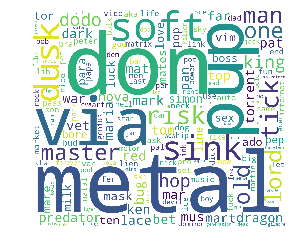

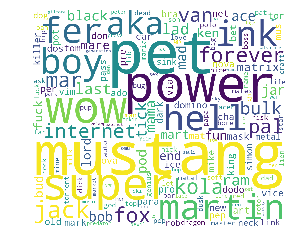

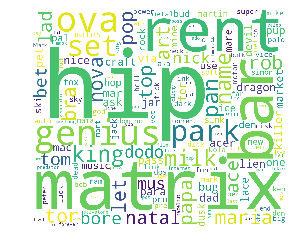

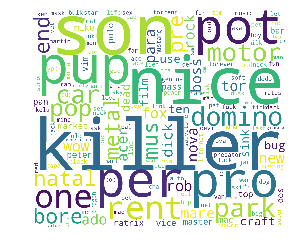

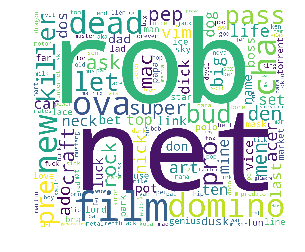

In [27]:
import matplotlib.pyplot as plt
for t in range(ldaENG.num_topics):
    topp=[]
    for i in range(0,200):
        topp.append(ldaENG.show_topic(t, 200)[i][0])
        topp
    plt.figure()
    wordcloudENG = WordCloud(background_color="white",width=1000, height=860, margin=1).generate(" ".join(topp))
    plt.imshow(wordcloudENG)
    plt.axis("off")
    plt.show()
   # plt.title("Topic #" + str(t))
    plt.show()